In [27]:
import ROOT as rt
import math
import array as arr
rt.gStyle.SetOptStat(0)

In [28]:
c = rt.TCanvas("c","c",800,600)
c.SetLeftMargin(0.15)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [29]:
colors = [rt.kGreen - 2, rt.kRed, rt.kBlue, rt.kOrange, rt.kMagenta, rt.kCyan, rt.kYellow, rt.kGray, rt.kViolet, rt.kTeal, rt.kSpring, rt.kAzure, rt.kPink, rt.kCopper, rt.kOrange+7, rt.kSpring+9, rt.kTeal-7, rt.kAzure+2, rt.kPink+10, rt.kCopper+3, rt.kOrange-3, rt.kSpring-5, rt.kTeal+3, rt.kAzure-6, rt.kPink-7, rt.kCopper-9]

In [30]:
def do_dphi_system(dphi_dict, name):

    c1 = rt.TCanvas("c1","c1",800,600)
    c1.SetLeftMargin(0.15)

    color_index = 0
    leg = rt.TLegend(0.67, 0.67, 0.8, 0.8)
    leg.SetBorderSize(0)
    for key in dphi_dict:
        if key == "central value":
            central_plot = dphi_dict[key]
            central_plot.SetLineColor(rt.kBlack)
            central_plot.SetLineWidth(2)
            central_plot.GetYaxis().SetRangeUser(0.7*central_plot.GetMinimum(), 1.3*central_plot.GetMaximum())
            central_plot.SetTitle("")
            central_plot.GetYaxis().SetTitle("Counts")
            central_plot.GetXaxis().SetTitle("#Delta#varphi")
            central_plot.Draw()
            leg.AddEntry(central_plot, key, "l")
        else:
            varied_plot = dphi_dict[key]
            # varied_plot.Scale(central_plot.Integral()/varied_plot.Integral()) only done for PID as its not corrected for efficiency
            varied_plot.SetLineColor(colors[color_index])
            varied_plot.SetLineWidth(2)
            varied_plot.Draw("same")
            leg.AddEntry(varied_plot, key, "l")
        color_index += 1

    leg.Draw("SAME")
    c1.Draw()
    c1.SaveAs(name + "_values.pdf")

    c2 = rt.TCanvas("c2","c2",800,600)
    c2.SetLeftMargin(0.15)

    color_index = 0
    rms = 0
    n = 0
    for key in dphi_dict:
        if key == "central value":
            central_plot = dphi_dict[key]
            central_ratio = central_plot.Clone()
            central_ratio.SetTitle("")
            central_ratio.GetYaxis().SetTitle("Ratio")
            central_ratio.GetXaxis().SetTitle("#Delta#varphi")
            central_ratio.GetYaxis().SetRangeUser(0.5, 1.5)
            central_ratio.Divide(central_plot)
            central_ratio.SetLineColor(rt.kBlack)
            central_ratio.SetLineWidth(2)
            central_ratio.Draw("SAME")
        else:
            varied_plot = dphi_dict[key]
            ratio = varied_plot
            ratio.Divide(central_plot)
            ratio.SetLineColor(colors[color_index])
            ratio.SetLineWidth(2)
            ratio.Draw("SAME")
            for i in range(1, ratio.GetNbinsX()+1):
                rms += (ratio.GetBinContent(i) - 1)**2
                n += 1
        color_index += 1
    
    rms = math.sqrt(rms/n)

    leg.Draw("SAME")
    c2.Draw()
    c2.SaveAs(name + "_ratios.pdf")
    return rms
        

In [31]:
# central_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# narrow_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_1145_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# wide_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_116_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# shifted_left_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1086_1098_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# shifted_right_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_114_1155_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# file_dict = {
#     "central value": central_file,
#     "narrow": narrow_file,
#     "wide": wide_file,
#     "shifted left": shifted_left_file,
#     "shifted right": shifted_right_file
# }

# central_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# wide_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_wide.root")
# narrow_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_narrow.root")
# tof_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_tof.root")
# file_dict = {
#     "central value": central_file,
#     "narrow": narrow_file,
#     "wide": wide_file,
#     "require tof": tof_file
# }

central_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_15_25_delta_eta_12_normal.root")
# wide_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_15_25_delta_eta_12_wide.root")
# narrow_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_15_25_delta_eta_12_narrow.root")
# tof_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_15_25_delta_eta_12_tof.root")
file_dict = {
    "central value": central_file
    # "narrow": narrow_file,
    # "wide": wide_file,
    # "require tof": tof_file
}

central_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_25_40_delta_eta_12_normal.root")
# wide_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_25_40_delta_eta_12_wide.root")
# narrow_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_25_40_delta_eta_12_narrow.root")
# tof_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_25_40_delta_eta_12_tof.root")
file_dict = {
    "central value": central_file
    # "narrow": narrow_file,
    # "wide": wide_file,
    # "require tof": tof_file
}

# central_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_115_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# narrow_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_1145_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# wide_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_116_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# shifted_right_file = rt.TFile("output/v0_avg6_sideband_subtraction_rsb_1135_116_sig_1102_113_trig_40_80_assoc_20_40_delta_eta_12_normal.root")
# file_dict = {
#     "central value": central_file,
#     "narrow": narrow_file,
#     "wide": wide_file,
#     "shifted left (to other side)": shifted_left_file,
#     "shifted right": shifted_right_file
# }

In [32]:
dphi_dict_0_20 = {}
dphi_dict_20_50 = {}
dphi_dict_50_80 = {}

hh_dphi_dict_0_20 = {}
hh_dphi_dict_20_50 = {}
hh_dphi_dict_50_80 = {}

for key in file_dict:
    dphi_dict_0_20[key] = file_dict[key].Get("h_lambda_dphi_subtracted_0_20")
    dphi_dict_20_50[key] = file_dict[key].Get("h_lambda_dphi_subtracted_20_50")
    dphi_dict_50_80[key] = file_dict[key].Get("h_lambda_dphi_subtracted_50_80")

    hh_dphi_dict_0_20[key] = file_dict[key].Get("h_h_dphi_0_20")
    hh_dphi_dict_20_50[key] = file_dict[key].Get("h_h_dphi_20_50")
    hh_dphi_dict_50_80[key] = file_dict[key].Get("h_h_dphi_50_80")

In [ ]:
# rms_mass_0_20 = do_dphi_system(dphi_dict_0_20, "figures/dphi_mass_variation_0_20")
# rms_mass_20_50 = do_dphi_system(dphi_dict_20_50, "figures/dphi_mass_variation_20_50")
# rms_mass_50_80 = do_dphi_system(dphi_dict_50_80, "figures/dphi_mass_variation_50_80")

# print("RMS for 0-20% mass variation: ", rms_mass_0_20)
# print("RMS for 20-50% mass variation: ", rms_mass_20_50)
# print("RMS for 50-80% mass variation: ", rms_mass_50_80)

# rms_sideband_0_20 = do_dphi_system(dphi_dict_0_20, "figures/dphi_sb_variation_0_20")
# rms_sideband_20_50 = do_dphi_system(dphi_dict_20_50, "figures/dphi_sb_variation_20_50")
# rms_sideband_50_80 = do_dphi_system(dphi_dict_50_80, "figures/dphi_sb_variation_50_80")
# print("RMS for 0-20% sideband variation: ", rms_sideband_0_20)
# print("RMS for 20-50% sideband variation: ", rms_sideband_20_50)
# print("RMS for 50-80% sideband variation: ", rms_sideband_50_80)

rms_pid_0_20 = do_dphi_system(dphi_dict_0_20, "figures/dphi_pid_variation_0_20")
rms_pid_20_50 = do_dphi_system(dphi_dict_20_50, "figures/dphi_pid_variation_20_50")
rms_pid_50_80 = do_dphi_system(dphi_dict_50_80, "figures/dphi_pid_variation_50_80")

print("RMS for 0-20% pid variation: ", rms_pid_0_20)
print("RMS for 20-50% pid variation: ", rms_pid_20_50)
print("RMS for 50-80% pid variation: ", rms_pid_50_80)


In [33]:
total_dphi_sys_0_20 = math.sqrt(0.01**2 + 0.001**2 + 0.011**2 + 0.037**2)
total_dphi_sys_20_50 = math.sqrt(0.009**2 + 0.003**2 + 0.018**2 + 0.037**2)
total_dphi_sys_50_80 = math.sqrt(0.019**2 + 0.008**2 + 0.037**2 + 0.037**2)

hh_total_dphi_sys_0_20 = 0.035
hh_total_dphi_sys_20_50 = 0.035
hh_total_dphi_sys_50_80 = 0.035

In [34]:
print(total_dphi_sys_0_20)
print(total_dphi_sys_20_50)
print(total_dphi_sys_50_80)

0.039887341350358256
0.04222558466143483
0.05624055476255546


In [35]:
central_dphi_0_20_just_syst = dphi_dict_0_20["central value"].Clone("central_dphi_0_20")
central_dphi_20_50_just_syst = dphi_dict_20_50["central value"].Clone("central_dphi_20_50")
central_dphi_50_80_just_syst = dphi_dict_50_80["central value"].Clone("central_dphi_50_80")

hh_central_dphi_0_20_just_syst = hh_dphi_dict_0_20["central value"].Clone("hh_central_dphi_0_20")
hh_central_dphi_20_50_just_syst = hh_dphi_dict_20_50["central value"].Clone("hh_central_dphi_20_50")
hh_central_dphi_50_80_just_syst = hh_dphi_dict_50_80["central value"].Clone("hh_central_dphi_50_80")


In [36]:
for bin in range(1, 17):
    central_dphi_0_20_just_syst.SetBinError(bin, total_dphi_sys_0_20*central_dphi_0_20_just_syst.GetBinContent(bin))
    central_dphi_20_50_just_syst.SetBinError(bin, total_dphi_sys_20_50*central_dphi_20_50_just_syst.GetBinContent(bin))
    central_dphi_50_80_just_syst.SetBinError(bin, total_dphi_sys_50_80*central_dphi_50_80_just_syst.GetBinContent(bin))

    hh_central_dphi_0_20_just_syst.SetBinError(bin, hh_total_dphi_sys_0_20*hh_central_dphi_0_20_just_syst.GetBinContent(bin))
    hh_central_dphi_20_50_just_syst.SetBinError(bin, hh_total_dphi_sys_20_50*hh_central_dphi_20_50_just_syst.GetBinContent(bin))
    hh_central_dphi_50_80_just_syst.SetBinError(bin, hh_total_dphi_sys_50_80*hh_central_dphi_50_80_just_syst.GetBinContent(bin))

Info in <TCanvas::Print>: pdf file figures/h_lambda_dphi_0_20_stats_and_syst_lowpt.pdf has been created


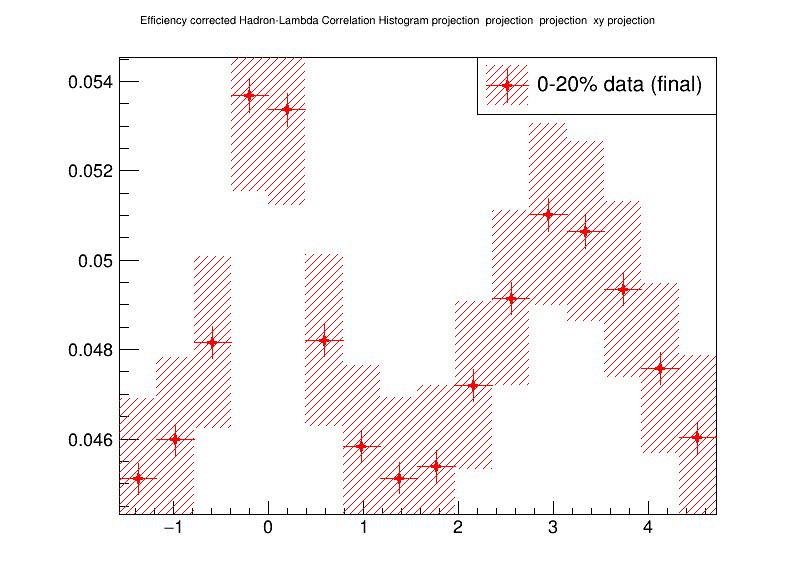

In [37]:
dphi_dict_0_20["central value"].SetLineColor(rt.kRed)
dphi_dict_0_20["central value"].Draw()
central_dphi_0_20_just_syst.SetMarkerStyle(43)
central_dphi_0_20_just_syst.SetMarkerSize(2)
central_dphi_0_20_just_syst.SetMarkerColor(rt.kRed)
central_dphi_0_20_just_syst.SetLineColor(rt.kRed)
central_dphi_0_20_just_syst.SetFillColor(rt.kRed)
central_dphi_0_20_just_syst.SetFillStyle(3004)
central_dphi_0_20_just_syst.Draw("SAME E2")
leg = rt.TLegend(0.6, 0.8, 0.9, 0.9)
leg.AddEntry(central_dphi_0_20_just_syst, "0-20% data (final)", "lepf")
# leg.AddEntry(central_dphi_0_20_just_syst, "0-20% data (only syst. errors)", "lf")
leg.Draw("same")
c.Draw()
c.SaveAs("figures/h_lambda_dphi_0_20_stats_and_syst_lowpt.pdf")
# c.SaveAs("figures/h_lambda_dphi_0_20_onlysyst.pdf")

Info in <TCanvas::Print>: pdf file figures/h_lambda_dphi_20_50_stats_and_syst_lowpt.pdf has been created


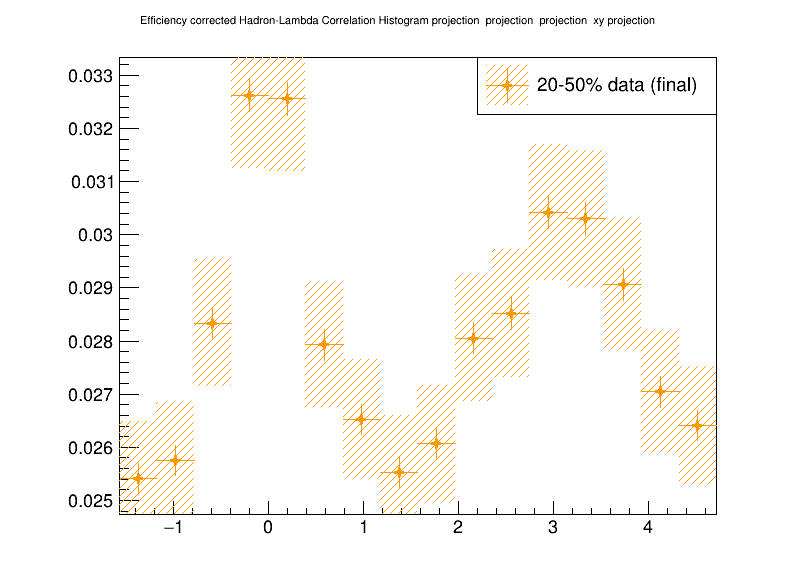

In [39]:

dphi_dict_20_50["central value"].SetLineColor(rt.kOrange - 3)
dphi_dict_20_50["central value"].Draw()
central_dphi_20_50_just_syst.SetMarkerStyle(43)
central_dphi_20_50_just_syst.SetMarkerSize(2)
central_dphi_20_50_just_syst.SetMarkerColor(rt.kOrange - 3)
central_dphi_20_50_just_syst.SetLineColor(rt.kOrange - 3)
central_dphi_20_50_just_syst.SetFillColor(rt.kOrange - 3)
central_dphi_20_50_just_syst.SetFillStyle(3004)
central_dphi_20_50_just_syst.Draw("E2 SAME")
leg = rt.TLegend(0.6, 0.8, 0.9, 0.9)
leg.AddEntry(central_dphi_20_50_just_syst, "20-50% data (final)", "lepf")
# leg.AddEntry(central_dphi_20_50_just_syst, "20-50% data (only syst. errors)", "lf")
leg.Draw("same")
c.Draw()
c.SaveAs("figures/h_lambda_dphi_20_50_stats_and_syst_lowpt.pdf")
# c.SaveAs("figures/h_lambda_dphi_20_50_onlysyst.pdf")

Info in <TCanvas::Print>: pdf file figures/h_lambda_dphi_50_80_stats_and_syst_lowpt.pdf has been created


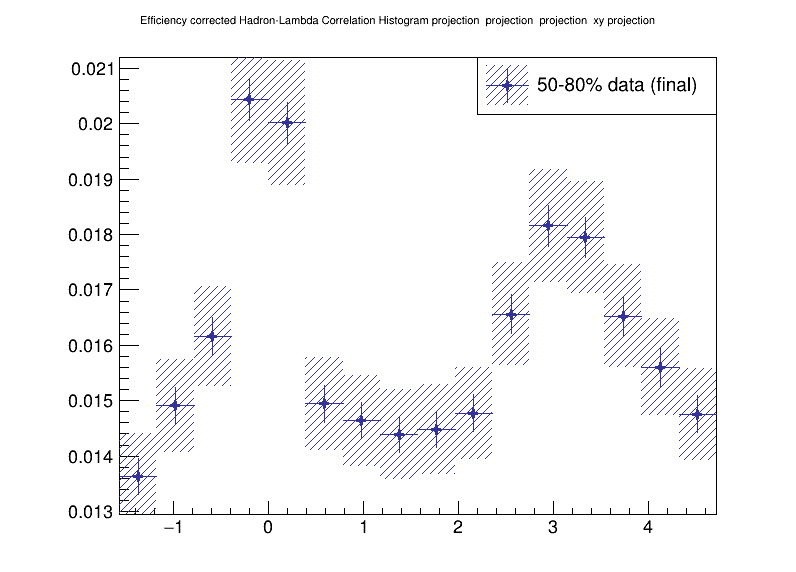

In [40]:

dphi_dict_50_80["central value"].SetLineColor(rt.kBlue - 2)
dphi_dict_50_80["central value"].Draw()
central_dphi_50_80_just_syst.SetMarkerStyle(43)
central_dphi_50_80_just_syst.SetMarkerSize(2)
central_dphi_50_80_just_syst.SetMarkerColor(rt.kBlue - 2)
central_dphi_50_80_just_syst.SetLineColor(rt.kBlue - 2)
central_dphi_50_80_just_syst.SetFillColor(rt.kBlue - 2)
central_dphi_50_80_just_syst.SetFillStyle(3004)
central_dphi_50_80_just_syst.Draw("E2 SAME")
leg = rt.TLegend(0.6, 0.8, 0.9, 0.9)
leg.AddEntry(central_dphi_50_80_just_syst, "50-80% data (final)", "lepf")
# leg.AddEntry(central_dphi_50_80_just_syst, "50-80% data (only syst. errors)", "lf")
leg.Draw("same")
c.Draw()
c.SaveAs("figures/h_lambda_dphi_50_80_stats_and_syst_lowpt.pdf")
# c.SaveAs("figures/h_lambda_dphi_50_80_onlysyst.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_dphi_0_20_stats_and_syst_highpt.pdf has been created


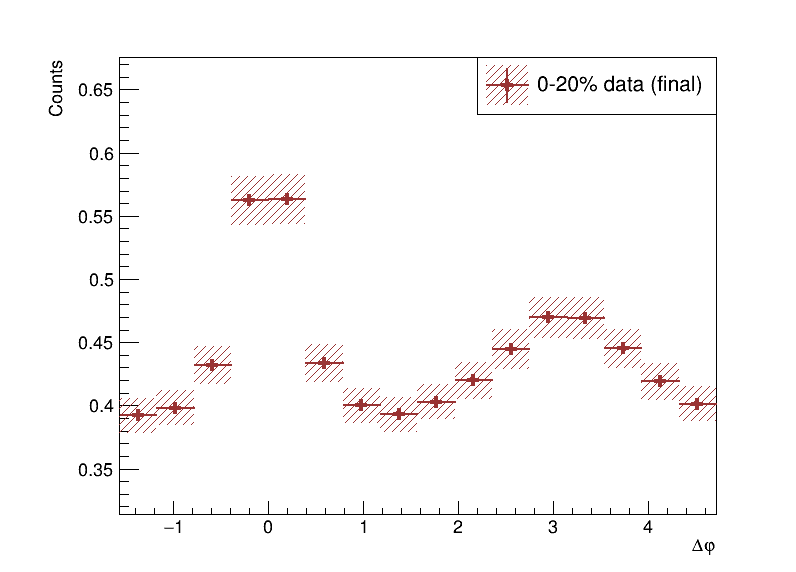

In [41]:
hh_dphi_dict_0_20["central value"].GetYaxis().SetRangeUser(hh_dphi_dict_0_20["central value"].GetMinimum()*0.8, hh_dphi_dict_0_20["central value"].GetMaximum()*1.2)
hh_dphi_dict_0_20["central value"].SetLineColor(rt.kRed - 2)
hh_dphi_dict_0_20["central value"].SetTitle("")
hh_dphi_dict_0_20["central value"].GetXaxis().SetTitle("#Delta#varphi")
hh_dphi_dict_0_20["central value"].GetYaxis().SetTitle("Counts")
hh_dphi_dict_0_20["central value"].SetLineWidth(2)
hh_dphi_dict_0_20["central value"].Draw()

hh_central_dphi_0_20_just_syst.GetYaxis().SetRangeUser(hh_central_dphi_0_20_just_syst.GetMinimum()*0.8, hh_central_dphi_0_20_just_syst.GetMaximum()*1.2)
hh_central_dphi_0_20_just_syst.SetMarkerStyle(34)
hh_central_dphi_0_20_just_syst.SetMarkerSize(1.5)
hh_central_dphi_0_20_just_syst.SetMarkerColor(rt.kRed - 2)
hh_central_dphi_0_20_just_syst.SetLineColor(rt.kRed - 2)
hh_central_dphi_0_20_just_syst.SetTitle("")
hh_central_dphi_0_20_just_syst.GetXaxis().SetTitle("#Delta#varphi")
hh_central_dphi_0_20_just_syst.GetYaxis().SetTitle("Counts")
hh_central_dphi_0_20_just_syst.SetLineWidth(2)
hh_central_dphi_0_20_just_syst.SetFillColor(rt.kRed - 2)
hh_central_dphi_0_20_just_syst.SetFillStyle(3004)
hh_central_dphi_0_20_just_syst.Draw("E2 SAME")
leg = rt.TLegend(0.6, 0.8, 0.9, 0.9)
leg.AddEntry(hh_central_dphi_0_20_just_syst, "0-20% data (final)", "lepf")
# leg.AddEntry(hh_central_dphi_0_20_just_syst, "0-20% data (only syst. errors)", "lf")
leg.Draw("same")
c.Draw()
c.SaveAs("figures/h_h_dphi_0_20_stats_and_syst_highpt.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_dphi_20_50_stats_and_syst_highpt.pdf has been created


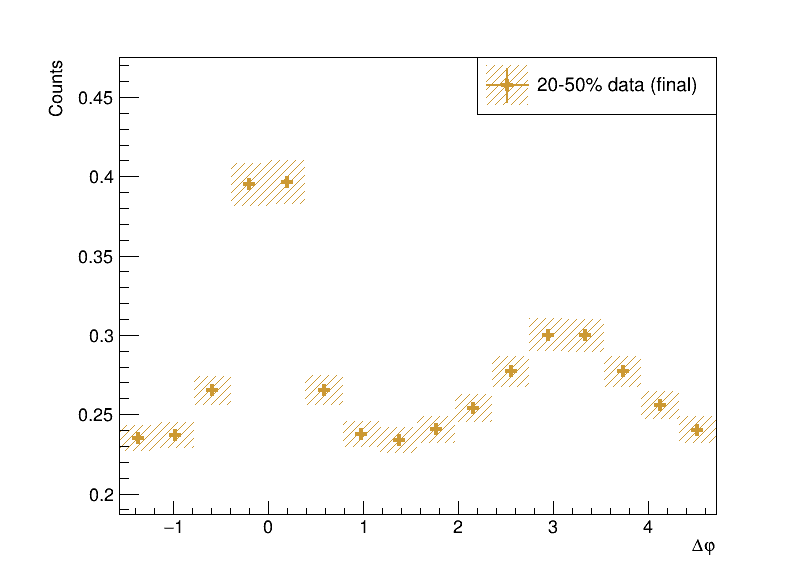

In [42]:
hh_dphi_dict_20_50["central value"].GetYaxis().SetRangeUser(hh_dphi_dict_20_50["central value"].GetMinimum()*0.8, hh_dphi_dict_20_50["central value"].GetMaximum()*1.2)
hh_dphi_dict_20_50["central value"].SetLineColor(rt.kOrange - 5)
hh_dphi_dict_20_50["central value"].SetTitle("")
hh_dphi_dict_20_50["central value"].GetXaxis().SetTitle("#Delta#varphi")
hh_dphi_dict_20_50["central value"].GetYaxis().SetTitle("Counts")
hh_dphi_dict_20_50["central value"].SetLineWidth(2)
hh_dphi_dict_20_50["central value"].Draw()

hh_central_dphi_20_50_just_syst.GetYaxis().SetRangeUser(hh_central_dphi_20_50_just_syst.GetMinimum()*0.8, hh_central_dphi_20_50_just_syst.GetMaximum()*1.2)
hh_central_dphi_20_50_just_syst.SetMarkerStyle(34)
hh_central_dphi_20_50_just_syst.SetMarkerSize(1.5)
hh_central_dphi_20_50_just_syst.SetMarkerColor(rt.kOrange - 5)
hh_central_dphi_20_50_just_syst.SetLineColor(rt.kOrange - 5)
hh_central_dphi_20_50_just_syst.SetTitle("")
hh_central_dphi_20_50_just_syst.GetXaxis().SetTitle("#Delta#varphi")
hh_central_dphi_20_50_just_syst.GetYaxis().SetTitle("Counts")
hh_central_dphi_20_50_just_syst.SetLineWidth(2)
hh_central_dphi_20_50_just_syst.SetFillColor(rt.kOrange - 5)
hh_central_dphi_20_50_just_syst.SetFillStyle(3004)
hh_central_dphi_20_50_just_syst.Draw("E2")
leg = rt.TLegend(0.6, 0.8, 0.9, 0.9)
leg.AddEntry(hh_central_dphi_20_50_just_syst, "20-50% data (final)", "lepf")
# leg.AddEntry(hh_central_dphi_20_50_just_syst, "20-50% data (only syst. errors)", "lf")
leg.Draw("same")
c.Draw()
c.SaveAs("figures/h_h_dphi_20_50_stats_and_syst_highpt.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_dphi_50_80_stats_and_syst_highpt.pdf has been created


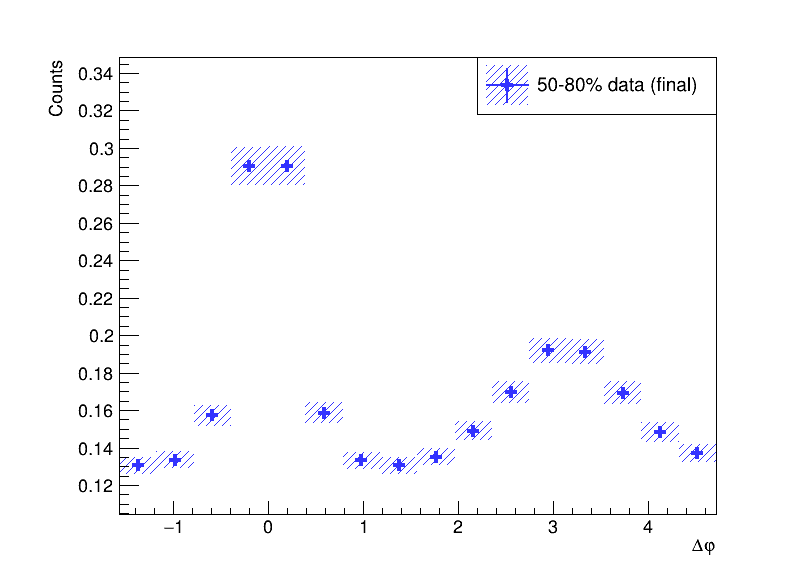

In [43]:
hh_dphi_dict_50_80["central value"].GetYaxis().SetRangeUser(hh_dphi_dict_50_80["central value"].GetMinimum()*0.8, hh_dphi_dict_50_80["central value"].GetMaximum()*1.2)
hh_dphi_dict_50_80["central value"].SetLineColor(rt.kBlue - 4)
hh_dphi_dict_50_80["central value"].SetTitle("")
hh_dphi_dict_50_80["central value"].GetXaxis().SetTitle("#Delta#varphi")
hh_dphi_dict_50_80["central value"].GetYaxis().SetTitle("Counts")
hh_dphi_dict_50_80["central value"].SetLineWidth(2)
hh_dphi_dict_50_80["central value"].Draw()

hh_central_dphi_50_80_just_syst.GetYaxis().SetRangeUser(hh_central_dphi_50_80_just_syst.GetMinimum()*0.8, hh_central_dphi_50_80_just_syst.GetMaximum()*1.2)
hh_central_dphi_50_80_just_syst.SetMarkerStyle(34)
hh_central_dphi_50_80_just_syst.SetMarkerSize(1.5)
hh_central_dphi_50_80_just_syst.SetMarkerColor(rt.kBlue - 4)
hh_central_dphi_50_80_just_syst.SetLineColor(rt.kBlue - 4)
hh_central_dphi_50_80_just_syst.SetTitle("")
hh_central_dphi_50_80_just_syst.GetXaxis().SetTitle("#Delta#varphi")
hh_central_dphi_50_80_just_syst.GetYaxis().SetTitle("Counts")
hh_central_dphi_50_80_just_syst.SetLineWidth(2)
hh_central_dphi_50_80_just_syst.SetFillColor(rt.kBlue - 4)
hh_central_dphi_50_80_just_syst.SetFillStyle(3004)
hh_central_dphi_50_80_just_syst.Draw("E2")
leg = rt.TLegend(0.6, 0.8, 0.9, 0.9)
leg.AddEntry(hh_central_dphi_50_80_just_syst, "50-80% data (final)", "lepf")
# leg.AddEntry(hh_central_dphi_50_80_just_syst, "50-80% data (only syst. errors)", "lf")
leg.Draw("same")
c.Draw()
c.SaveAs("figures/h_h_dphi_50_80_stats_and_syst_highpt.pdf")

In [44]:
v0_dphi_dist_0_20 = dphi_dict_0_20["central value"].Clone()
v0_dphi_dist_20_50 = dphi_dict_20_50["central value"].Clone()
v0_dphi_dist_50_80 = dphi_dict_50_80["central value"].Clone()

v0_ue_line_0_20 = file_dict["central value"].Get("ue_line_0_20")
v0_ue_line_20_50 = file_dict["central value"].Get("ue_line_20_50")
v0_ue_line_50_80 = file_dict["central value"].Get("ue_line_50_80")

In [45]:
v0_ue_line_0_20.SetLineColor(rt.kPink - 2)
v0_ue_line_20_50.SetLineColor(rt.kOrange - 4)
v0_ue_line_50_80.SetLineColor(rt.kBlue - 4)

central_dphi_0_20_just_syst.SetFillColor(rt.kPink - 2)
central_dphi_20_50_just_syst.SetFillColor(rt.kOrange - 4)
central_dphi_50_80_just_syst.SetFillColor(rt.kBlue - 4)

central_dphi_0_20_just_syst.SetFillStyle(3001)
central_dphi_20_50_just_syst.SetFillStyle(3001)
central_dphi_50_80_just_syst.SetFillStyle(3001)


v0_ue_line_0_20.SetLineStyle(3)
v0_ue_line_20_50.SetLineStyle(3)
v0_ue_line_50_80.SetLineStyle(3)

v0_ue_line_0_20.SetLineWidth(1)
v0_ue_line_20_50.SetLineWidth(1)
v0_ue_line_50_80.SetLineWidth(1)

v0_dphi_dist_0_20.SetLineColor(rt.kPink - 1)
v0_dphi_dist_20_50.SetLineColor(rt.kOrange - 3)
v0_dphi_dist_50_80.SetLineColor(rt.kBlue - 3)


v0_dphi_dist_0_20.SetMarkerStyle(20)
v0_dphi_dist_20_50.SetMarkerStyle(20)
v0_dphi_dist_50_80.SetMarkerStyle(20)

v0_dphi_dist_0_20.SetMarkerColor(rt.kPink - 1)
v0_dphi_dist_20_50.SetMarkerColor(rt.kOrange - 3)
v0_dphi_dist_50_80.SetMarkerColor(rt.kBlue - 3)


v0_dphi_dist_0_20.SetMarkerSize(1)
v0_dphi_dist_20_50.SetMarkerSize(1)
v0_dphi_dist_50_80.SetMarkerSize(1)


central_dphi_0_20_just_syst.SetTitle("")
central_dphi_0_20_just_syst.GetXaxis().SetTitle("#Delta#varphi_{h-#Lambda}")
central_dphi_0_20_just_syst.GetYaxis().SetTitle("Per-trigger dN/d#Delta#varphi for constant #Delta#eta (rad^{-1})")


# v0_dphi_dist_0_20.GetYaxis().SetRangeUser(0, 1.1 * v0_dphi_dist_0_20.GetMaximum())

central_dphi_20_50_just_syst.SetTitle("")
central_dphi_20_50_just_syst.GetXaxis().SetTitle("#Delta#varphi_{h-#Lambda}")
# central_dphi_20_50_just_syst.GetYaxis().SetRangeUser(0, 1.1 * v0_dphi_dist_0_20.GetMaximum())

central_dphi_50_80_just_syst.SetTitle("")
central_dphi_50_80_just_syst.GetXaxis().SetTitle("#Delta#varphi_{h-#Lambda}")
# central_dphi_50_80_just_syst.GetYaxis().SetRangeUser(0, 1.1 * v0_dphi_dist_0_20.GetMaximum())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: dphi_all
Info in <TCanvas::Print>: pdf file figures/h_lambda_dphi_all_highpt.pdf has been created


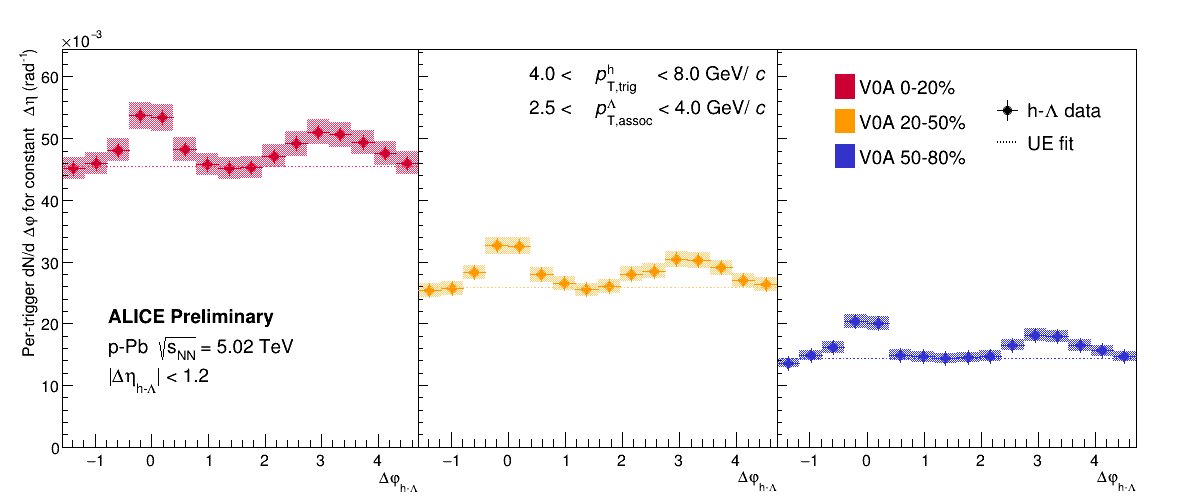

In [46]:
TOP_MARGIN = 0.1
BOTTOM_MARGIN = 0.1
LEFT_MARGIN = 0.15
PAD_WIDTH = 0.3
BUFFER = 0.05
SCALE = PAD_WIDTH/(PAD_WIDTH + BUFFER)

X_LABEL_SIZE = 0.05
Y_LABEL_SIZE = 0.05
X_TITLE_SIZE = 0.05
Y_TITLE_SIZE = 0.05

MAX_Y_RANGE = v0_dphi_dist_0_20.GetMaximum()*1.2

dphi_all = rt.TCanvas("dphi_all", "dphi_all", 50, 50, 1200, 525)
dphi_all.SetMargin(0, 0, 0, 0)
hl020pad = rt.TPad("hl020pad", "", 0, 0, PAD_WIDTH + BUFFER, 1.0)
hl020pad.SetMargin(LEFT_MARGIN, 0.0, BOTTOM_MARGIN, TOP_MARGIN)
hl020pad.Draw()
hl020pad.cd()

central_dphi_0_20_just_syst.GetYaxis().SetMaxDigits(3)
central_dphi_0_20_just_syst.GetYaxis().SetTitleSize(SCALE*Y_TITLE_SIZE)
central_dphi_0_20_just_syst.GetYaxis().SetLabelSize(SCALE*Y_LABEL_SIZE)
central_dphi_0_20_just_syst.GetYaxis().SetTitleOffset(1.2)
central_dphi_0_20_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)
central_dphi_0_20_just_syst.GetXaxis().SetLabelSize(SCALE*X_LABEL_SIZE)
central_dphi_0_20_just_syst.GetXaxis().SetTitleSize(SCALE*X_TITLE_SIZE)

central_dphi_0_20_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)
central_dphi_0_20_just_syst.Draw("E2")
v0_dphi_dist_0_20.Draw("SAME")
v0_ue_line_0_20.Draw("SAME")

label_x_start = 0.26
label_y_start = 0.38
label_text_space = 0.06

alice_data_label = rt.TLatex()
alice_data_label.SetNDC()
alice_data_label.SetTextSize(0.05)
alice_data_label.SetTextAlign(13)
alice_data_label.DrawLatex(label_x_start, label_y_start, "ALICE Preliminary")
alice_data_label.DrawLatex(label_x_start, label_y_start - label_text_space, "#bf{p-Pb #sqrt{s_{NN}} = 5.02 TeV}")
alice_data_label.DrawLatex(label_x_start, label_y_start - 2*label_text_space, "#bf{|#Delta#eta_{h-#Lambda}| < 1.2}")



dphi_all.cd()

hl2050pad = rt.TPad("hl2050pad", "", PAD_WIDTH + BUFFER, 0, 2*PAD_WIDTH + BUFFER, 1.0)
hl2050pad.SetMargin(0.0, 0.0, BOTTOM_MARGIN, TOP_MARGIN)
hl2050pad.Draw()
hl2050pad.cd()


v0_dphi_dist_20_50.GetXaxis().SetLabelOffset(-0.002)
v0_dphi_dist_20_50.GetXaxis().SetTitleOffset(0.83)
v0_dphi_dist_20_50.GetXaxis().SetLabelSize(X_LABEL_SIZE)
v0_dphi_dist_20_50.GetXaxis().SetTitleSize(X_TITLE_SIZE)

central_dphi_20_50_just_syst.GetXaxis().SetLabelOffset(-0.002)
central_dphi_20_50_just_syst.GetXaxis().SetTitleOffset(0.83)
central_dphi_20_50_just_syst.GetXaxis().SetLabelSize(X_LABEL_SIZE)
central_dphi_20_50_just_syst.GetXaxis().SetTitleSize(X_TITLE_SIZE)
central_dphi_20_50_just_syst.GetYaxis().SetLabelSize(0.0)
central_dphi_20_50_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)

v0_dphi_dist_20_50.GetYaxis().SetLabelSize(0.0)
v0_dphi_dist_20_50.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)

central_dphi_20_50_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)
central_dphi_20_50_just_syst.Draw("E2")
v0_dphi_dist_20_50.Draw("SAME")
v0_ue_line_20_50.Draw("SAME")

pt_label_x_start = 0.31
pt_label_y_start = 0.87
pt_label_text_space = 0.07

pt_data_label = rt.TLatex()
pt_data_label.SetNDC()
pt_data_label.SetTextSize(0.05/SCALE)
pt_data_label.SetTextAlign(13)
pt_data_label.DrawLatex(pt_label_x_start, pt_label_y_start, "#bf{4.0 <   #it{p}^{h}_{T,trig}    < 8.0 GeV/#it{c}}")
pt_data_label.DrawLatex(pt_label_x_start, pt_label_y_start - pt_label_text_space, "#bf{2.5 <   #it{p}^{#Lambda}_{T,assoc} < 4.0 GeV/#it{c}}")



dphi_all.cd()

hl5080pad = rt.TPad("hl5080pad", "", 2*PAD_WIDTH + BUFFER, 0, 3*PAD_WIDTH + BUFFER, 1.0)
hl5080pad.SetMargin(0.0, 0.0, BOTTOM_MARGIN, TOP_MARGIN)
hl5080pad.Draw()
hl5080pad.cd()


v0_dphi_dist_50_80.GetXaxis().SetLabelOffset(-0.002)
v0_dphi_dist_50_80.GetXaxis().SetTitleOffset(0.83)
v0_dphi_dist_50_80.GetXaxis().SetLabelSize(X_LABEL_SIZE)
v0_dphi_dist_50_80.GetXaxis().SetTitleSize(X_TITLE_SIZE)

v0_dphi_dist_50_80.GetYaxis().SetLabelSize(0.0)
v0_dphi_dist_50_80.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)


central_dphi_50_80_just_syst.GetXaxis().SetLabelOffset(-0.002)
central_dphi_50_80_just_syst.GetXaxis().SetTitleOffset(0.83)
central_dphi_50_80_just_syst.GetXaxis().SetLabelSize(X_LABEL_SIZE)
central_dphi_50_80_just_syst.GetXaxis().SetTitleSize(X_TITLE_SIZE)
central_dphi_50_80_just_syst.GetYaxis().SetLabelSize(0.0)
central_dphi_50_80_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)

central_dphi_50_80_just_syst.Draw("E2")
v0_dphi_dist_50_80.Draw("SAME")
v0_ue_line_50_80.Draw("SAME")

color_legend = rt.TLegend(0.15, 0.65, 0.47, 0.86)
color_legend.SetTextSize(0.05/SCALE)
color_legend.SetBorderSize(0)
color_legend.SetFillStyle(0)

legend_box_0_20 = rt.TBox(0.55, 0.65, 0.85, 0.86)
legend_box_0_20.SetFillStyle(1001)
legend_box_0_20.SetFillColor(rt.kPink - 1)
legend_box_0_20.SetLineWidth(0)

legend_box_20_50 = rt.TBox(0.55, 0.65, 0.85, 0.86)
legend_box_20_50.SetFillStyle(1001)
legend_box_20_50.SetFillColor(rt.kOrange - 3)
legend_box_20_50.SetLineWidth(0)

legend_box_50_80 = rt.TBox(0.55, 0.65, 0.85, 0.86)
legend_box_50_80.SetFillStyle(1001)
legend_box_50_80.SetFillColor(rt.kBlue - 3)
legend_box_50_80.SetLineWidth(0)

color_legend.AddEntry(legend_box_0_20, "V0A 0-20%", "f")
color_legend.AddEntry(legend_box_20_50, "V0A 20-50%", "f")
color_legend.AddEntry(legend_box_50_80, "V0A 50-80%", "f")

color_legend.Draw()

marker_legend = rt.TLegend(0.6, 0.68, 0.93, 0.81)
marker_legend.SetTextSize(0.05/SCALE)
marker_legend.SetBorderSize(0)
marker_legend.SetFillStyle(0)

legend_marker = rt.TMarker(0.55, 0.65, 20)
legend_marker.SetMarkerColor(rt.kBlack)
legend_marker.SetMarkerStyle(20)
legend_marker.SetMarkerSize(1)

legend_line = rt.TLine(0.7, 0.65, 0.95, 0.65)
legend_line.SetLineColor(rt.kBlack)
legend_line.SetLineWidth(2)
legend_line.SetLineStyle(3)

marker_legend.AddEntry(legend_marker, " h-#Lambda data", "lep")
marker_legend.AddEntry(legend_line, " UE fit", "l")

marker_legend.Draw()



dphi_all.Draw()
dphi_all.SaveAs("figures/h_lambda_dphi_all_highpt.pdf")

In [20]:
v0_dphi_dist_0_20 = hh_dphi_dict_0_20["central value"].Clone()
v0_dphi_dist_20_50 = hh_dphi_dict_20_50["central value"].Clone()
v0_dphi_dist_50_80 = hh_dphi_dict_50_80["central value"].Clone()

v0_ue_line_0_20 = file_dict["central value"].Get("hh_ue_line_0_20")
v0_ue_line_20_50 = file_dict["central value"].Get("hh_ue_line_20_50")
v0_ue_line_50_80 = file_dict["central value"].Get("hh_ue_line_50_80")

central_dphi_0_20_just_syst = hh_central_dphi_0_20_just_syst
central_dphi_20_50_just_syst = hh_central_dphi_20_50_just_syst
central_dphi_50_80_just_syst = hh_central_dphi_50_80_just_syst


In [24]:

v0_dphi_dist_0_20.SetLineColor(rt.kPink - 6)
v0_dphi_dist_20_50.SetLineColor(rt.kOrange - 6)
v0_dphi_dist_50_80.SetLineColor(rt.kBlue - 6)

central_dphi_0_20_just_syst.SetFillColor(rt.kPink - 6)
central_dphi_20_50_just_syst.SetFillColor(rt.kOrange - 6)
central_dphi_50_80_just_syst.SetFillColor(rt.kBlue - 6)

central_dphi_0_20_just_syst.SetFillStyle(3001)
central_dphi_20_50_just_syst.SetFillStyle(3001)
central_dphi_50_80_just_syst.SetFillStyle(3001)



v0_dphi_dist_0_20.SetMarkerStyle(21)
v0_dphi_dist_20_50.SetMarkerStyle(21)
v0_dphi_dist_50_80.SetMarkerStyle(21)

v0_dphi_dist_0_20.SetMarkerColor(rt.kPink - 6)
v0_dphi_dist_20_50.SetMarkerColor(rt.kOrange - 6)
v0_dphi_dist_50_80.SetMarkerColor(rt.kBlue - 6)

v0_dphi_dist_0_20.SetMarkerSize(0)
v0_dphi_dist_20_50.SetMarkerSize(0)
v0_dphi_dist_50_80.SetMarkerSize(0)

central_dphi_0_20_just_syst.SetTitle("")
central_dphi_0_20_just_syst.GetXaxis().SetTitle("#Delta#varphi_{h-h}")
central_dphi_0_20_just_syst.GetYaxis().SetTitle("Per-trigger dN/d#Delta#varphi for constant #Delta#eta (rad^{-1})")
# central_dphi_0_20_just_syst.GetYaxis().SetRangeUser(0, 1.2 * v0_dphi_dist_0_20.GetMaximum())

central_dphi_20_50_just_syst.SetTitle("")
central_dphi_20_50_just_syst.GetXaxis().SetTitle("#Delta#varphi_{h-h}")
# central_dphi_20_50_just_syst.GetYaxis().SetRangeUser(0, 1.2 * v0_dphi_dist_0_20.GetMaximum())

central_dphi_50_80_just_syst.SetTitle("")
central_dphi_50_80_just_syst.GetXaxis().SetTitle("#Delta#varphi_{h-h}")
# central_dphi_20_50_just_syst.GetYaxis().SetRangeUser(0, 1.2 * v0_dphi_dist_0_20.GetMaximum())

In [25]:
v0_ue_line_0_20.SetLineColor(rt.kPink - 6)
v0_ue_line_20_50.SetLineColor(rt.kOrange - 6)
v0_ue_line_50_80.SetLineColor(rt.kBlue - 6)

v0_ue_line_0_20.SetLineStyle(3)
v0_ue_line_20_50.SetLineStyle(3)
v0_ue_line_50_80.SetLineStyle(3)

v0_ue_line_0_20.SetLineWidth(1)
v0_ue_line_20_50.SetLineWidth(1)
v0_ue_line_50_80.SetLineWidth(1)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: dphi_all
Info in <TCanvas::Print>: pdf file figures/h_h_dphi_all_lowpt.pdf has been created


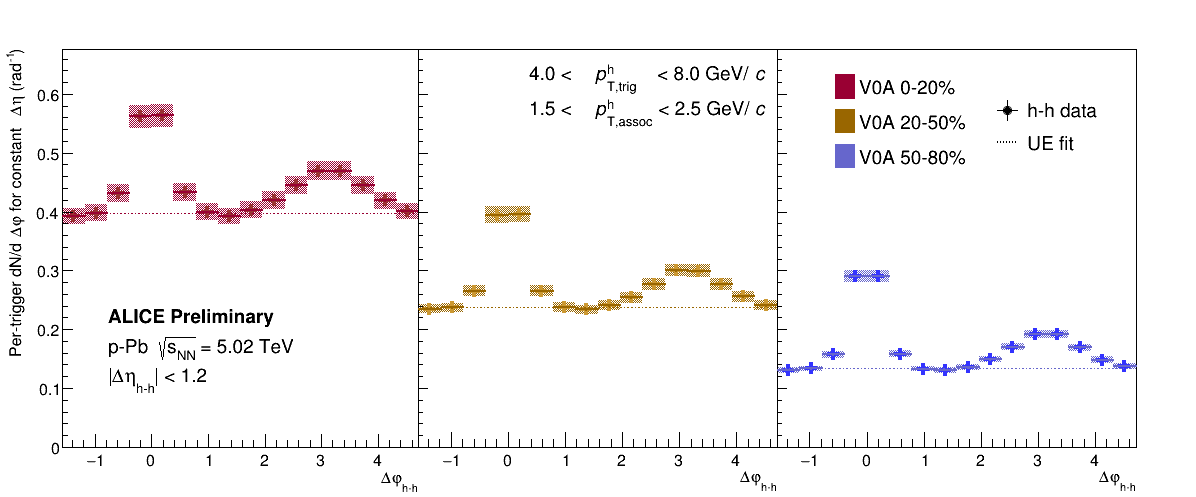

In [26]:
TOP_MARGIN = 0.1
BOTTOM_MARGIN = 0.1
LEFT_MARGIN = 0.15
PAD_WIDTH = 0.3
BUFFER = 0.05
SCALE = PAD_WIDTH/(PAD_WIDTH + BUFFER)

X_LABEL_SIZE = 0.05
Y_LABEL_SIZE = 0.05
X_TITLE_SIZE = 0.05
Y_TITLE_SIZE = 0.05

# MAX_Y_RANGE = v0_dphi_dist_0_20.GetMaximum()*1.2
MAX_Y_RANGE = v0_dphi_dist_0_20.GetMaximum()

dphi_all = rt.TCanvas("dphi_all", "dphi_all", 50, 50, 1200, 525)
dphi_all.SetMargin(0, 0, 0, 0)
hl020pad = rt.TPad("hl020pad", "", 0, 0, PAD_WIDTH + BUFFER, 1.0)
hl020pad.SetMargin(LEFT_MARGIN, 0.0, BOTTOM_MARGIN, TOP_MARGIN)
hl020pad.Draw()
hl020pad.cd()

central_dphi_0_20_just_syst.GetYaxis().SetMaxDigits(3)
central_dphi_0_20_just_syst.GetYaxis().SetTitleSize(SCALE*Y_TITLE_SIZE)
central_dphi_0_20_just_syst.GetYaxis().SetLabelSize(SCALE*Y_LABEL_SIZE)
central_dphi_0_20_just_syst.GetYaxis().SetTitleOffset(1.65)
central_dphi_0_20_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)
central_dphi_0_20_just_syst.GetXaxis().SetLabelSize(SCALE*X_LABEL_SIZE)
central_dphi_0_20_just_syst.GetXaxis().SetTitleSize(SCALE*X_TITLE_SIZE)

central_dphi_0_20_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)
central_dphi_0_20_just_syst.Draw("E2")
v0_dphi_dist_0_20.Draw("SAME")
v0_ue_line_0_20.Draw("SAME")

label_x_start = 0.26
label_y_start = 0.38
label_text_space = 0.06

alice_data_label = rt.TLatex()
alice_data_label.SetNDC()
alice_data_label.SetTextSize(0.05)
alice_data_label.SetTextAlign(13)
alice_data_label.DrawLatex(label_x_start, label_y_start, "ALICE Preliminary")
alice_data_label.DrawLatex(label_x_start, label_y_start - label_text_space, "#bf{p-Pb #sqrt{s_{NN}} = 5.02 TeV}")
alice_data_label.DrawLatex(label_x_start, label_y_start - 2*label_text_space, "#bf{|#Delta#eta_{h-h}| < 1.2}")



dphi_all.cd()

hl2050pad = rt.TPad("hl2050pad", "", PAD_WIDTH + BUFFER, 0, 2*PAD_WIDTH + BUFFER, 1.0)
hl2050pad.SetMargin(0.0, 0.0, BOTTOM_MARGIN, TOP_MARGIN)
hl2050pad.Draw()
hl2050pad.cd()


v0_dphi_dist_20_50.GetXaxis().SetLabelOffset(-0.002)
v0_dphi_dist_20_50.GetXaxis().SetTitleOffset(0.83)
v0_dphi_dist_20_50.GetXaxis().SetLabelSize(X_LABEL_SIZE)
v0_dphi_dist_20_50.GetXaxis().SetTitleSize(X_TITLE_SIZE)

central_dphi_20_50_just_syst.GetXaxis().SetLabelOffset(-0.002)
central_dphi_20_50_just_syst.GetXaxis().SetTitleOffset(0.83)
central_dphi_20_50_just_syst.GetXaxis().SetLabelSize(X_LABEL_SIZE)
central_dphi_20_50_just_syst.GetXaxis().SetTitleSize(X_TITLE_SIZE)
central_dphi_20_50_just_syst.GetYaxis().SetLabelSize(0.0)
central_dphi_20_50_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)

v0_dphi_dist_20_50.GetYaxis().SetLabelSize(0.0)
v0_dphi_dist_20_50.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)

central_dphi_20_50_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)
central_dphi_20_50_just_syst.Draw("E2")
v0_dphi_dist_20_50.Draw("SAME")
v0_ue_line_20_50.Draw("SAME")

pt_label_x_start = 0.31
pt_label_y_start = 0.87
pt_label_text_space = 0.07

pt_data_label = rt.TLatex()
pt_data_label.SetNDC()
pt_data_label.SetTextSize(0.05/SCALE)
pt_data_label.SetTextAlign(13)
pt_data_label.DrawLatex(pt_label_x_start, pt_label_y_start, "#bf{4.0 <   #it{p}^{h}_{T,trig}    < 8.0 GeV/#it{c}}")
pt_data_label.DrawLatex(pt_label_x_start, pt_label_y_start - pt_label_text_space, "#bf{2.5 <   #it{p}^{h}_{T,assoc} < 4.0 GeV/#it{c}}")



dphi_all.cd()

hl5080pad = rt.TPad("hl5080pad", "", 2*PAD_WIDTH + BUFFER, 0, 3*PAD_WIDTH + BUFFER, 1.0)
hl5080pad.SetMargin(0.0, 0.0, BOTTOM_MARGIN, TOP_MARGIN)
hl5080pad.Draw()
hl5080pad.cd()


v0_dphi_dist_50_80.GetXaxis().SetLabelOffset(-0.002)
v0_dphi_dist_50_80.GetXaxis().SetTitleOffset(0.83)
v0_dphi_dist_50_80.GetXaxis().SetLabelSize(X_LABEL_SIZE)
v0_dphi_dist_50_80.GetXaxis().SetTitleSize(X_TITLE_SIZE)

v0_dphi_dist_50_80.GetYaxis().SetLabelSize(0.0)
v0_dphi_dist_50_80.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)


central_dphi_50_80_just_syst.GetXaxis().SetLabelOffset(-0.002)
central_dphi_50_80_just_syst.GetXaxis().SetTitleOffset(0.83)
central_dphi_50_80_just_syst.GetXaxis().SetLabelSize(X_LABEL_SIZE)
central_dphi_50_80_just_syst.GetXaxis().SetTitleSize(X_TITLE_SIZE)
central_dphi_50_80_just_syst.GetYaxis().SetLabelSize(0.0)
central_dphi_50_80_just_syst.GetYaxis().SetRangeUser(0, MAX_Y_RANGE)

central_dphi_50_80_just_syst.Draw("E2")
v0_dphi_dist_50_80.Draw("SAME")
v0_ue_line_50_80.Draw("SAME")

color_legend = rt.TLegend(0.15, 0.65, 0.47, 0.86)
color_legend.SetTextSize(0.05/SCALE)
color_legend.SetBorderSize(0)
color_legend.SetFillStyle(0)

legend_box_0_20 = rt.TBox(0.55, 0.65, 0.85, 0.86)
legend_box_0_20.SetFillStyle(1001)
legend_box_0_20.SetFillColor(rt.kPink - 6)
legend_box_0_20.SetLineWidth(0)

legend_box_20_50 = rt.TBox(0.55, 0.65, 0.85, 0.86)
legend_box_20_50.SetFillStyle(1001)
legend_box_20_50.SetFillColor(rt.kOrange - 6)
legend_box_20_50.SetLineWidth(0)

legend_box_50_80 = rt.TBox(0.55, 0.65, 0.85, 0.86)
legend_box_50_80.SetFillStyle(1001)
legend_box_50_80.SetFillColor(rt.kBlue - 6)
legend_box_50_80.SetLineWidth(0)

color_legend.AddEntry(legend_box_0_20, "V0A 0-20%", "f")
color_legend.AddEntry(legend_box_20_50, "V0A 20-50%", "f")
color_legend.AddEntry(legend_box_50_80, "V0A 50-80%", "f")

color_legend.Draw()

marker_legend = rt.TLegend(0.6, 0.68, 0.93, 0.81)
marker_legend.SetTextSize(0.05/SCALE)
marker_legend.SetBorderSize(0)
marker_legend.SetFillStyle(0)

legend_marker = rt.TMarker(0.55, 0.65, 20)
legend_marker.SetMarkerColor(rt.kBlack)
legend_marker.SetMarkerStyle(20)
legend_marker.SetMarkerSize(1)

legend_line = rt.TLine(0.7, 0.65, 0.95, 0.65)
legend_line.SetLineColor(rt.kBlack)
legend_line.SetLineWidth(2)
legend_line.SetLineStyle(3)

marker_legend.AddEntry(legend_marker, " h-h data", "lep")
marker_legend.AddEntry(legend_line, " UE fit", "l")

marker_legend.Draw()



dphi_all.Draw()
dphi_all.SaveAs("figures/h_h_dphi_all_highpt.pdf")